In [1]:
import numpy as np
import sympy as sp
from numpy import linalg 
import matplotlib.pyplot as plt
from scipy.special import hankel1

$$\int_{0}^l \frac{\pi \iota}{2} H_{0}^{(1)} (k|x - s|)j(s)ds = e^{\iota kxcos \theta}, l = 2 \pi$$

In [2]:
#counting integral
def I(a, b, xm):
    intN = 50
    intH = (b - a) / intN
    intX = np.zeros((N, 1))
    intF = np.zeros((N, 1), dtype = np.complex)
    sum = 0
    for i in range(intN):
        intX[i] = (intH / 2) + i * intH + a
        intF[i] = hankel1(0, np.abs(xm - intX[i]))
        sum += intF[i]
    return sum * intH

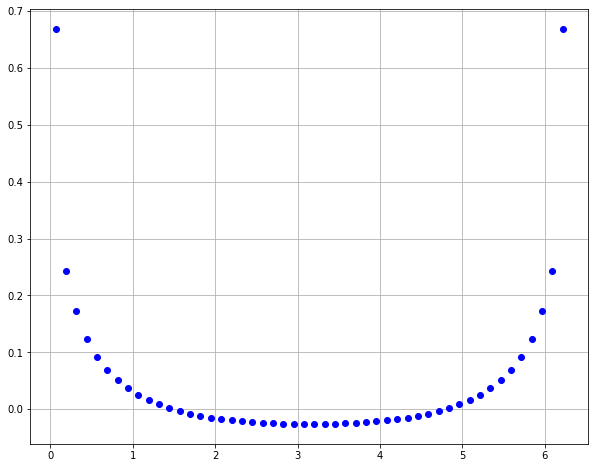

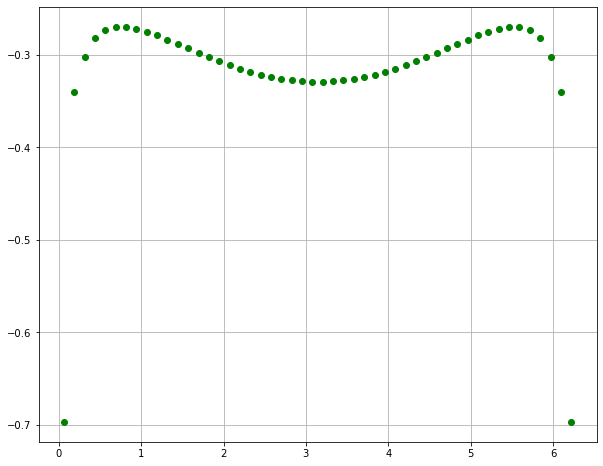

In [3]:
N = 50

h = 2 * np.pi / N

XM = np.zeros((N, 1))
for i in range(N):
    XM[i] = 0 + (h / 2) + i * h

SN = np.zeros((N + 1, 1))
for j in range(N + 1):
    SN[j] = 0 + j * h
    
#creating linear system
mat = np.zeros((N, N), dtype = np.complex)
for m in range(N):
    for n in range(N):
        mat[m, n] = I(SN[n], SN[n + 1], XM[m])

right = np.zeros((N, 1), dtype = np.complex)
for i in range(N):
    #right[i] = (2 * np.exp(1.j * XM[i])) / ( np.pi * 1.j) #theta = 0, cos(teta) = 1
    #right[i] = (2 * np.exp(1.j * XM[i] * np.sqrt(2) / 2)) / ( np.pi * 1.j) #theta = 45, cos(teta) = sqrt(2)/2
    right[i] = 2 / (np.pi * 1.j) #theta = 90, cos(theta) = 0 => exp = 1

answer = linalg.solve(mat, right)

plt.rcParams['figure.figsize'] = [10, 8]

res_real = np.real(answer)
plt.plot(XM, res_real, 'bo')
plt.grid()
plt.show()

res_imag = np.imag(answer)
plt.plot(XM, res_imag, 'bo', color = 'green')
plt.grid()
plt.show()

#res = np.sqrt(res_real * res_real + res_imag * res_imag)
#plt.plot(XM, res, 'bo', color ='cyan')
#plt.show()

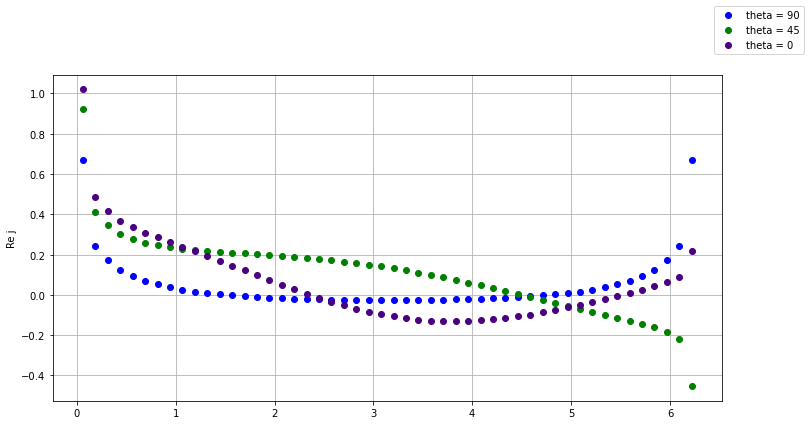

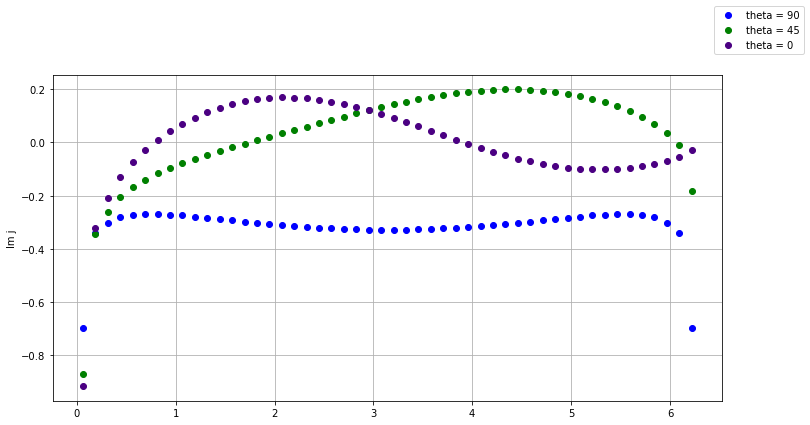

In [4]:
right1 = np.zeros((N, 1), dtype = np.complex)
for i in range(N):
    right1[i] = 2 / ( np.pi * 1.j) #theta = 90, cos(theta) = 0 => exp = 1

answer1 = linalg.solve(mat, right1)


right2 = np.zeros((N, 1), dtype = np.complex)
for i in range(N):
    right2[i] = (2 * np.exp(1.j * XM[i] * np.sqrt(2) / 2)) / ( np.pi * 1.j) #theta = 45, cos(theta) = sqrt(2)/2
    
answer2 = linalg.solve(mat, right2)


right3 = np.zeros((N, 1), dtype = np.complex)
for i in range(N):
    right3[i] = (2 * np.exp(1.j * XM[i])) / ( np.pi * 1.j) #theta = 0, cos(theta) = 1
    
answer3 = linalg.solve(mat, right3)


plt.rcParams['figure.figsize'] = [12, 6]

#real
res_real1 = np.real(answer1)
plt.plot(XM, res_real1, 'bo', label = "theta = 90")

res_real2 = np.real(answer2)
plt.plot(XM, res_real2, 'bo', color = 'green', label = "theta = 45")

res_real3 = np.real(answer3)
plt.plot(XM, res_real3, 'bo', color = '#4b0082', label = "theta = 0")

plt.legend(bbox_to_anchor=(1, 1.05),
           bbox_transform=plt.gcf().transFigure)

plt.ylabel("Re j")

plt.grid()
plt.show()

#imag
res_imag1 = np.imag(answer1)
plt.plot(XM, res_imag1, 'bo', label = "theta = 90")

res_imag2 = np.imag(answer2)
plt.plot(XM, res_imag2, 'bo', color = 'green', label = "theta = 45")

res_imag3 = np.imag(answer3)
plt.plot(XM, res_imag3, 'bo', color = '#4b0082', label = "theta = 0")

plt.legend(bbox_to_anchor=(1, 1.05),
           bbox_transform=plt.gcf().transFigure)

plt.ylabel("Im j")

plt.grid()
plt.show()